[SAMPLE CODE]
# データ分析の基本：相関分析（Correlation analysis）

このサンプルコードでは、次のことができます

- 相関分析

In [ ]:
# import エラー回避のための一時策
# !pip install seaborn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

import scipy.stats as sts
import seaborn as sns

/Users/hiroyasu.komaki/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


#### 環境PATH

In [2]:
csv_path = './csv/'

fname = 'dts_kisho'

## データ読み込み

In [6]:
# PATHを指定して読み込み
df = pd.read_csv(csv_path + fname +'.csv')
df.shape

(647, 11)

In [7]:
df.head()

,city,hiduke8,hiduke,avg_temp_c,max_temp_c,min_temp_c,rain_mm,sunlight_hour,snow_cm,wind_ms,wind_direction
0,東京都,20180101,2018-01-01,6.2,13.0,0.4,0.0,8.4,0.0,5.5,北西
1,東京都,20180102,2018-01-02,6.1,10.8,0.8,0.0,8.9,0.0,6.1,北西
2,東京都,20180103,2018-01-03,4.9,8.6,2.3,0.0,8.9,0.0,9.9,西北西
3,東京都,20180104,2018-01-04,4.7,9.6,0.0,0.0,8.8,0.0,5.4,北西
4,東京都,20180105,2018-01-05,3.7,6.3,0.8,0.0,0.1,0.0,3.8,北北西


## 相関分析 (Correlation analysis)

In [18]:
# 数値項目のみ
df2 = df.select_dtypes(include='number')

In [19]:
# Scipiによる分析
corr_mat = np.zeros((df2.shape[1], df2.shape[1]))
corr_mat_p = np.zeros((df2.shape[1], df2.shape[1]))

for i in range(df2.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = sts.pearsonr(df2[df2.columns[i]], df2[df2.columns[j]])
        corr_mat[i,j] = corrtest[0]
        corr_mat_p[i,j] = corrtest[1] # p value

df_corr = pd.DataFrame(corr_mat, columns=df2.columns, index=df2.columns)
df_corr_p = pd.DataFrame(corr_mat_p, columns=df2.columns, index=df2.columns)

Text(0.5, 1, 'P-Value')

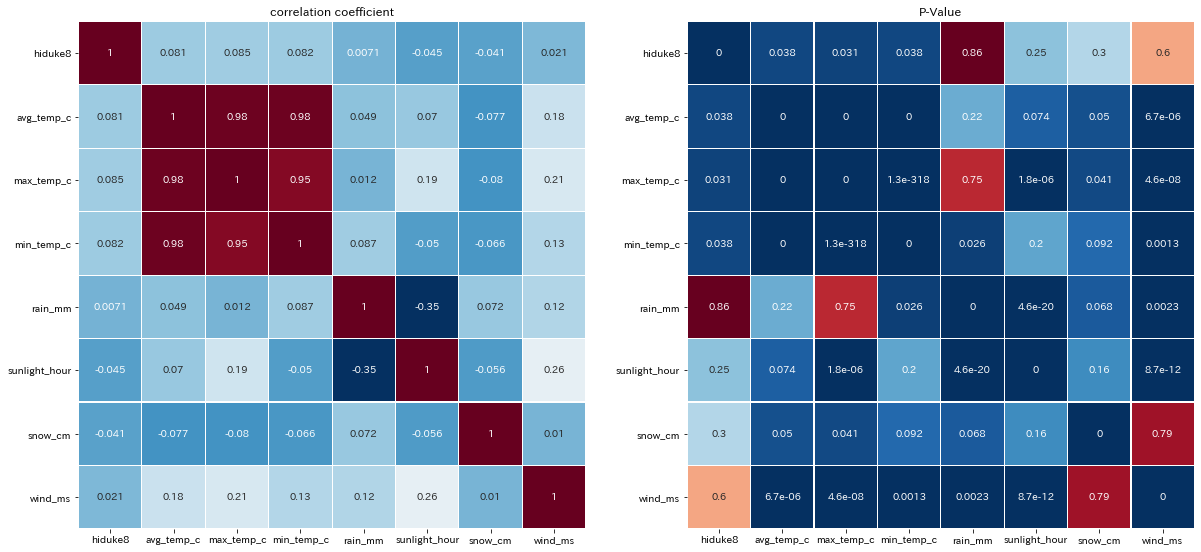

In [45]:
# ヒートマップで表示
fig = plt.figure(figsize=(20,20))

# 図表（一軸）
plt.subplot(1, 2, 1)
ax1 = plt.gca()

sns.heatmap(data=df_corr,
            cmap="RdBu_r", cbar=False,
            annot=True, 
            square=True, 
            linecolor='white', linewidths=0.1)

ax1.set_title("correlation coefficient")

# 図表２（一軸）
plt.subplot(1, 2, 2)
ax2 = plt.gca()

sns.heatmap(data=df_corr_p,
            cmap="RdBu_r", cbar=False,
            annot=True, 
            square=True, 
            linecolor='white', linewidths=0.1)

ax2.set_title("P-Value")

## 相関分析結果
- 最高気温、最低気温、平均気温に強い正の相関関係がある（一方が増加すれば、他方も増加する関係。またはその逆）
- 日照時間と降雨量には、強い負の相関関係がある（一方が増加すれば、他方は減少する関係。またはその逆）
- P-Value > 0.05 については有意性が認められないため再考すべき